### Exo 1 ###

Q2.

In [1]:
import numpy as np
def sample_X(x, p , n=1):
    samples = []
    summed_p = np.cumsum(p)
    for i in range(n):
        uni = np.random.uniform()
        for j in range(len(p)):
            if uni < summed_p[j]:
                samples.append(x[j])
                break
    return samples




In [2]:
sample_X([1,2,3], [0.1, 0.2, 0.7], 10)

[3, 2, 3, 3, 3, 1, 3, 2, 3, 2]

Q3.

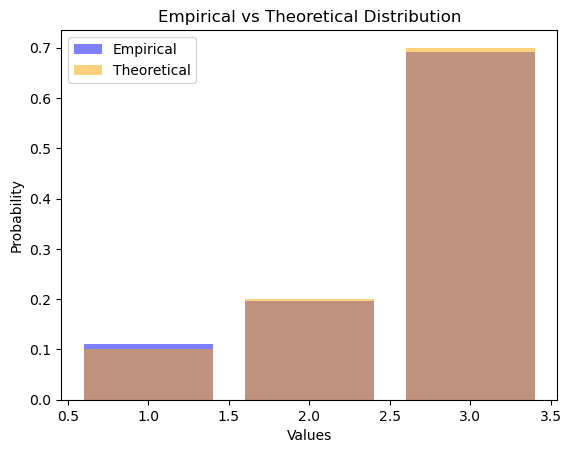

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction pour calculer la distribution empirique
def empirical_distribution(samples):
    n = len(samples)
    unique, counts = np.unique(samples, return_counts=True)
    return unique, counts / n

# Fonction pour tracer la distribution empirique et la comparer avec la distribution théorique
def plot_empirical_vs_theoretical_distribution(samples, expected_probs, labels):
    # Calculer la distribution empirique
    x_empirical, p_empirical = empirical_distribution(samples)
    
    # Tracer la distribution empirique
    plt.bar(x_empirical, p_empirical, alpha=0.5, label='Empirical', color='blue')

    # Tracer la distribution théorique
    plt.bar(labels, expected_probs, alpha=0.5, label='Theoretical', color='orange')

    # Configurer le graphique
    plt.xlabel('Values')
    plt.ylabel('Probability')
    plt.title('Empirical vs Theoretical Distribution')
    plt.legend()
    plt.show()

# Échantillons générés aléatoirement
samples = np.random.choice([1, 2, 3], p=[0.1, 0.2, 0.7], size=1000)

# Probabilités attendues et labels
expected_probs = [0.1, 0.2, 0.7]
labels = [1, 2, 3]

# Tracer les distributions
plot_empirical_vs_theoretical_distribution(samples, expected_probs, labels)



### Exercice 2 ###

Q2.

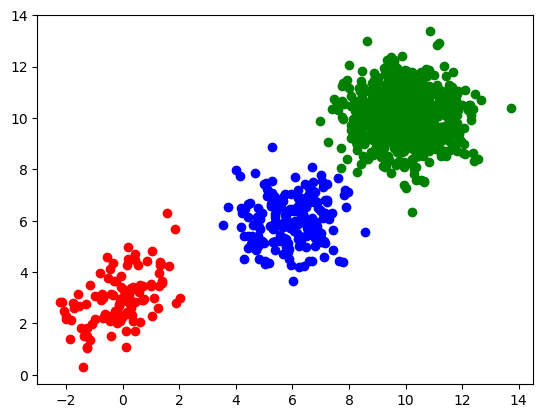

In [4]:
## Sample a set of gaussian a set of observation according to a Gaussian mixture law, with the parameters of your choice
p = 3
d = 2

coordinates = [0,1,2]
p = [0.1, 0.2, 0.7]
d = 2 

mu = [[0,3], [6,6], [10,10]]
sigma = [[1., 0.5], [0.5, 1.]], [[1., 0.], [0., 1.]], [[1., 0.], [0., 1.]]

# Sample the Z_j

Z = sample_X(coordinates, p, 1000)

# Sample the X_i
x_1 = []
x_2 = []
x_3 = []
for z in Z:
    if z == 0:
        x_1.append(np.random.multivariate_normal(mu[z], sigma[z]))
    elif z == 1:
        x_2.append(np.random.multivariate_normal(mu[z], sigma[z]))
    else:
        x_3.append(np.random.multivariate_normal(mu[z], sigma[z]))
#plot x avec des couleurs différentes
plt.scatter(*zip(*x_1), color='red')
plt.scatter(*zip(*x_2), color='blue')
plt.scatter(*zip(*x_3), color='green')
plt.show()


Q3.

In [5]:
import numpy as np
from scipy.stats import multivariate_normal
from tqdm import tqdm

def density_gaussian(X, mu, sigma):
    d = len(mu)
    return multivariate_normal.pdf(X, mu, sigma)


log_likelihoods = []
def EM(X, m, max_iter=100):
    n = len(X)
    d = 1 if isinstance(X[0], int) else len(X[0])
    
    # Initialisation
    alpha = np.ones(m) / m
    mu = np.random.rand(m, d)
    sigma = np.array([np.eye(d) for _ in range(m)])
    
    for _ in tqdm(range(max_iter)):
        # Expectation step
        gamma = np.zeros((n, m))
        for i in range(n):
            for j in range(m):
                gamma[i, j] = alpha[j] * density_gaussian(X[i], mu[j], sigma[j])
            gamma[i, :] /= np.sum(gamma[i, :])
        
        # Maximization step
        for j in range(m):
            N_j = np.sum(gamma[:, j])
            alpha[j] = N_j / n
            mu[j] = np.sum(gamma[:, j][:, np.newaxis] * X, axis=0) / N_j
            sigma[j] = sum(gamma[i, j] * np.outer(X[i] - mu[j], X[i] - mu[j]) for i in range(n)) / N_j
        log_likelihoods.append(np.sum(np.log(np.sum(alpha[j] * density_gaussian(X, mu[j], sigma[j]) for j in range(m)))))
    return alpha, mu, sigma





  0%|          | 0/100 [00:00<?, ?it/s]/tmp/ipykernel_1766994/659071532.py:34: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  log_likelihoods.append(np.sum(np.log(np.sum(alpha[j] * density_gaussian(X, mu[j], sigma[j]) for j in range(m)))))
100%|██████████| 100/100 [00:08<00:00, 12.09it/s]

alpha réel :  [0.1, 0.2, 0.7]
alpha estimé :  [0.18867656 0.10998928 0.70133415]
mu réel :  [[0, 3], [6, 6], [10, 10]]
mu estimé :  [[ 5.97980872  6.01528229]
 [-0.11310522  2.95406348]
 [10.01517492 10.04490499]]
sigma réel :  ([[1.0, 0.5], [0.5, 1.0]], [[1.0, 0.0], [0.0, 1.0]], [[1.0, 0.0], [0.0, 1.0]])
sigma estimé :  [[[ 0.95294476  0.08506898]
  [ 0.08506898  0.87850529]]

 [[ 0.96935401  0.50393527]
  [ 0.50393527  1.01048678]]

 [[ 1.02929518 -0.03413173]
  [-0.03413173  0.94798374]]]


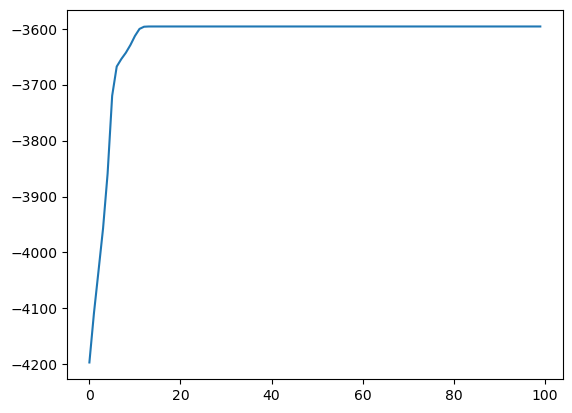

In [6]:
## Test the EM algorithm on the samples
X = np.array(x_1 + x_2 + x_3)
alpha_est, mu_est, sigma_est = EM(X, 3)
# Comparaison des paramètres estimés avec les paramètres réels
print("alpha réel : ", p)
print("alpha estimé : ", alpha_est)
print("mu réel : ", mu)
print("mu estimé : ", mu_est)
print("sigma réel : ", sigma)
print("sigma estimé : ", sigma_est)

plt.plot(log_likelihoods)
plt.show()


In [7]:
log_likelihoods[:20]

[-4196.7872124631085,
 -4108.638977317201,
 -4033.246548525661,
 -3957.055590955761,
 -3859.0074929119332,
 -3719.82391173551,
 -3667.6109265899286,
 -3654.2815928498026,
 -3642.986143063732,
 -3629.1973056208044,
 -3612.9205296393898,
 -3600.3069767976476,
 -3596.3985485638223,
 -3595.9874707265776,
 -3595.9632171033877,
 -3595.9619597447663,
 -3595.961896269291,
 -3595.961893085103,
 -3595.9618929256085,
 -3595.961892917622]

Question 4. Are the estimated parameters far from the original ones ?



The estimated parameters are really close from the original ones, which shows that our algorithm converges correctly ! Also, the log-likelihoods converge towards a fixed value, with the right alpha, mu and sigma parameters.

Q5. Download the data Crude Birth/Death Rate– See esa.un.org/unpd/wpp/ for instance– and plot the associated scatter graph. What do you think about using a Gaussian mixture model ? 

/tmp/ipykernel_1766994/2425670703.py:4: DtypeWarning: Columns (2,3,4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


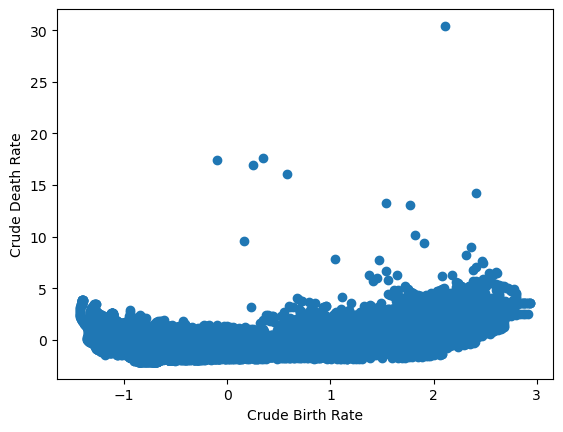

In [8]:
import pandas as pd 

file = "WPP2024_Demographic_Indicators_Medium.csv"
df = pd.read_csv(file)
df = df[["CDR", "CBR"]]
df = df.dropna()
mean = df.mean()
std = df.std()
df = (df-mean)/std
plt.scatter(df["CBR"], df["CDR"])
plt.ylabel("Crude Death Rate")
plt.xlabel("Crude Birth Rate")
X = df[["CDR", "CBR"]].to_numpy()

The data shown above have a complex structure, we may discover a bunch of 2 or 3 ellipsis shaping the global form. This last quote can prove that our idea of using a Gaussian mixture model to interpret these data can be a good idea. This is what we are going to verify in Q6.

Q6. Estimate the parameters θ for different values of m, try to interpret them and compute the BIC. Plot the corresponding p.d.f over the scatter plot. 

In [10]:
def plot_cluster_EM_gaussian(data,y,mu,sigma,k=4):
    ## Function to draw the Gaussian contour at 90%.
   
    ## Input
    # data=data set 
    # max iter= maximum number of iteractions.
    # y= label of the data
    # mu= list with mean values
    # sigma= list with covariate matrices
    # k= number of clusters to find

    plt.figure()
    plt.scatter(data[:,0],data[:,1],c=y)
    s=4.6057
    
    for j in np.arange(0,k):   
        [V, D] = np.linalg.eig(sigma[j] * s)
        t = np.linspace(0,2*np.pi)
        vec = np.array([np.cos(t),np.sin(t)])
        VD = D@np.sqrt(np.diag(V))
        z=VD@vec+mu[j].reshape(-1,1)
        plt.plot(z[0,:],z[1,:])

In [15]:
EM_1=EM(X,1,max_iter=100)
print(EM_1)

  0%|          | 0/100 [00:00<?, ?it/s]/tmp/ipykernel_1766994/659071532.py:34: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  log_likelihoods.append(np.sum(np.log(np.sum(alpha[j] * density_gaussian(X, mu[j], sigma[j]) for j in range(m)))))
100%|██████████| 100/100 [04:14<00:00,  2.54s/it]

(array([1.]), array([[ 1.13951368e-16, -1.01064011e-16]]), array([[[0.99998807, 0.35290638],
        [0.35290638, 0.99998807]]]))


 Le BIC vaut 185235.91816232534


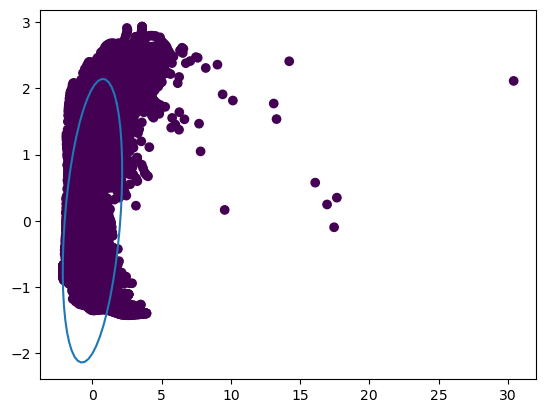

In [24]:
alpha, mu, sigma = EM_1
label_1=np.apply_along_axis(np.argmax,1,alpha * np.array([density_gaussian(X,mu[i],sigma[i]) for i in range(1)]).T)
df1 = len(alpha)*(1+2+3)-1
BIC_1 = -log_likelihoods[-1]+((df1)*np.log(X.shape[0]))/2
print(f" Le BIC vaut", BIC_1)
plot_cluster_EM_gaussian(X,label_1,mu,sigma,k=1)

In [25]:
EM_2 = EM(X,2)

  0%|          | 0/100 [00:00<?, ?it/s]/tmp/ipykernel_1766994/659071532.py:34: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  log_likelihoods.append(np.sum(np.log(np.sum(alpha[j] * density_gaussian(X, mu[j], sigma[j]) for j in range(m)))))
100%|██████████| 100/100 [07:57<00:00,  4.77s/it]


 Le BIC vaut 175904.21750888252


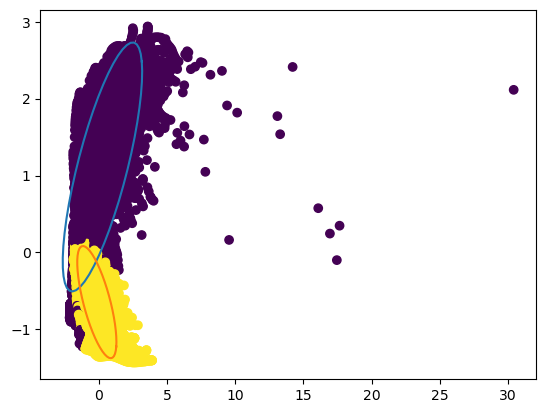

In [26]:
alpha, mu, sigma = EM_2
df2 = len(alpha)*(1+2+3)-1
BIC_2 = -log_likelihoods[-1]+((df2)*np.log(X.shape[0]))/2
print(f" Le BIC vaut", BIC_2)
label_2 = np.apply_along_axis(np.argmax, 1, alpha * np.array([density_gaussian(X, mu[i], sigma[i]) for i in range(2)]).T)
plot_cluster_EM_gaussian(X, label_2, mu, sigma, k=2)


In [27]:
EM_3 = EM(X, 3)

  0%|          | 0/100 [00:00<?, ?it/s]/tmp/ipykernel_1766994/659071532.py:34: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  log_likelihoods.append(np.sum(np.log(np.sum(alpha[j] * density_gaussian(X, mu[j], sigma[j]) for j in range(m)))))
100%|██████████| 100/100 [11:39<00:00,  6.99s/it]


 Le BIC vaut 160294.7635924761


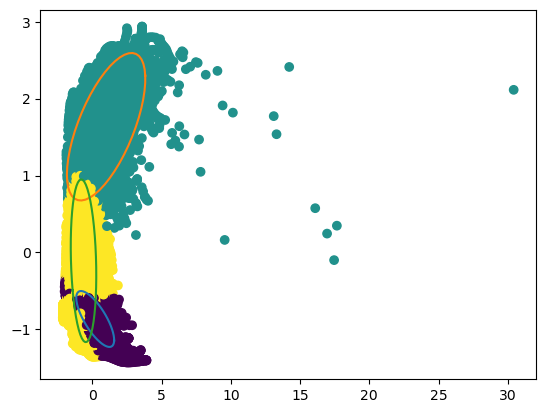

In [28]:
alpha, mu, sigma = EM_3
df3 = len(alpha)*(1+2+3)-1
BIC_3 = -log_likelihoods[-1]+((df3)*np.log(X.shape[0]))/2
print(f" Le BIC vaut", BIC_3)
label_3 = np.apply_along_axis(np.argmax, 1, alpha * np.array([density_gaussian(X, mu[i], sigma[i]) for i in range(3)]).T)
plot_cluster_EM_gaussian(X, label_3, mu, sigma, k=3)

In [29]:
EM_4 = EM(X, 4)

  0%|          | 0/100 [00:00<?, ?it/s]/tmp/ipykernel_1766994/659071532.py:34: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  log_likelihoods.append(np.sum(np.log(np.sum(alpha[j] * density_gaussian(X, mu[j], sigma[j]) for j in range(m)))))
100%|██████████| 100/100 [15:20<00:00,  9.21s/it]


 Le BIC vaut 155971.99718630328


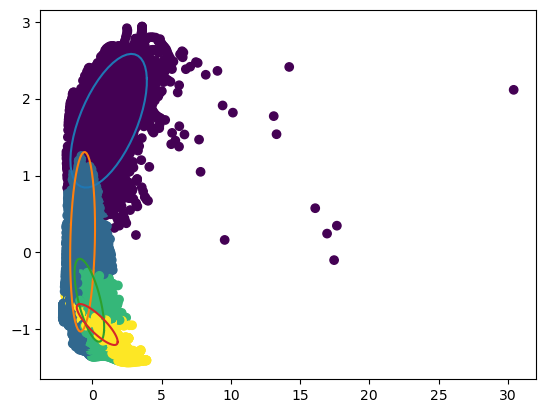

In [30]:
alpha, mu, sigma = EM_4
df4 = len(alpha)*(1+2+3)-1
BIC_4 = -log_likelihoods[-1]+((df4)*np.log(X.shape[0]))/2
print(f" Le BIC vaut", BIC_4)
label_4 = np.apply_along_axis(np.argmax, 1, alpha * np.array([density_gaussian(X, mu[i], sigma[i]) for i in range(4)]).T)
plot_cluster_EM_gaussian(X, label_4, mu, sigma, k=4)


### Exercise 3 ###

Q1.  Implement a simple importance sampling procedure for the previous functions.

In [31]:
def f(x):
    return 2*np.sin(np.pi*x/1.5) if x>=0 else 0

def p(x):
    return x**0.65 * np.exp(-x**2 / 2) if x>=0 else 0

def q(x,mu):
    return 2 * np.exp(-(mu-x)**2 / 3.) / np.sqrt(2*np.pi*1.5) if x>=0 else 0

def simple_importance_sampling(n, f, p, q, mu=0.8, sigma=1.5):
    # generate random samples on R+ with equal probability
    samples = np.random.normal(mu, sigma, n)
    for i in range(n):
        while samples[i] < 0:
            samples[i] = np.random.normal(mu, sigma)
    weights = [p(x)/q(x,mu) for x in samples]
    weights = np.array(weights)/np.sum(weights)
    approx =  np.sum([f(x)*weights[i] for i,x in enumerate(samples)]) / n
    return approx, weights

def integrated(f, max_range):
    # Calculated the integral of f along [0, max_range]
    return np.sum([f(x) for x in np.linspace(0, max_range, 10000)])/10000

2. Compute the mean and the variance of the importance sampling estimate of Ep[f(X)]. You can use several sample sizes.

In [32]:
list_N = [10, 100, 1000, 10000]
means = []
variance = []
weights = []

for n in list_N:
    predictions = [simple_importance_sampling(n, f, p, q, 0.8) for i in range(100)]
    predicted_means = [prediction[0] for prediction in predictions]
    predicted_weights = [prediction[1] for prediction in predictions]
    means.append(np.mean(predicted_means))
    variance.append(np.var(predicted_means))
    weights.append(predicted_weights)
    print(f"n={n}, mean={means[-1]}, variance={variance[-1]}")


n=10, mean=0.06887456991808473, variance=0.001984783454830334
n=100, mean=0.006808585666138277, variance=2.253099247512717e-06
n=1000, mean=0.0006801915487172175, variance=1.5780333207360986e-09
n=10000, mean=6.837456778088971e-05, variance=1.7870313162575647e-12


Question 3.


In [33]:
means_mu_6 = []
variance_mu_6 = []
weights_mu_6 = []

for n in list_N:
    predictions = [simple_importance_sampling(n, f, p, q, 6) for i in range(100)]
    predicted_means = [prediction[0] for prediction in predictions]
    predicted_weights = [prediction[1] for prediction in predictions]
    means_mu_6.append(np.mean(predicted_means))
    variance_mu_6.append(np.var(predicted_means))
    weights_mu_6.append(predicted_weights)
    print(f"n={n}, mean={means_mu_6[-1]}, variance={variance_mu_6[-1]}")



n=10, mean=0.04830532544925706, variance=0.01721815915092977
n=100, mean=-0.0065376289309635825, variance=0.00011175181119996017
n=1000, mean=0.00036975735286395324, variance=1.2018862520427366e-06
n=10000, mean=0.00011899090481818881, variance=5.588619847225104e-10


In [34]:

_, weights_q3 = simple_importance_sampling(1000,f,p,q,0.8)
_, weights_q3_6 = simple_importance_sampling(1000,f,p,q,6)
print("Poids d'importance normalisé, pour la moyenne 0.8", weights_q3[:10])
print("Poids d'importance normalisé, pour la moyenne 6", weights_q3_6[:10])

Poids d'importance normalisé, pour la moyenne 0.8 [0.00070387 0.00136149 0.00087924 0.0002459  0.00150571 0.0002839
 0.00150903 0.00094662 0.00121955 0.00054145]
Poids d'importance normalisé, pour la moyenne 6 [1.00160225e-14 1.25657419e-11 9.24538596e-12 2.03227849e-12
 1.57162941e-14 3.51602173e-07 1.93824811e-12 2.97370848e-13
 7.27163156e-08 6.04715069e-07]


Question 4.

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal
from tqdm import tqdm
import copy

import numpy as np
from scipy.stats import multivariate_normal

import numpy as np
from scipy.stats import multivariate_normal

# Fonction de densité de la distribution "banana"
def calc_banana_density(data, variance, dim, param_b):
    adjusted_data = np.copy(data)
    adjusted_data[:, 1] += param_b * (adjusted_data[:, 0] ** 2 - variance ** 2)
    covariance_matrix = np.eye(dim) * np.array([variance ** 2] + [1] * (dim - 1))
    return multivariate_normal.pdf(adjusted_data, mean=np.zeros(dim), cov=covariance_matrix)

# Fonction pour calculer la densité d'un mélange gaussien
def calc_mixture_density(data, proportions, means, covariances):
    densities = np.zeros((data.shape[0], len(proportions)))
    for i, (alpha, mu, sigma) in enumerate(zip(proportions, means, covariances)):
        densities[:, i] = alpha * multivariate_normal.pdf(data, mean=mu, cov=sigma)
    return np.sum(densities, axis=1)

# Calcul de la log-vraisemblance pour un mélange gaussien
def log_likelihood_mixture(data, proportions, means, covariances):
    log_densities = calc_mixture_density(data, proportions, means, covariances)
    return np.sum(np.log(log_densities + 1e-12))

# Calcul des poids pour l'échantillonnage d'importance
def calc_weights(data, proportions, means, covariances, variance, dim, param_b):
    log_weights = np.log(calc_banana_density(data, variance, dim, param_b)) - np.log(calc_mixture_density(data, proportions, means, covariances))
    normalized_weights = np.exp(log_weights - np.max(log_weights))
    normalized_weights /= np.sum(normalized_weights)
    return log_weights, normalized_weights

# Étape E de l'algorithme EM
def e_step_em(data, proportions, means, covariances):
    tau = np.zeros((data.shape[0], len(proportions)))
    for i, (alpha, mu, sigma) in enumerate(zip(proportions, means, covariances)):
        tau[:, i] = alpha * multivariate_normal.pdf(data, mean=mu, cov=sigma)
    tau /= np.sum(tau, axis=1, keepdims=True)
    return tau

# Étape M de l'algorithme EM modifiée pour intégrer les poids
def m_step_em(data, tau, weights):
    num_components = tau.shape[1]
    num_features = data.shape[1]
    updated_proportions = np.zeros(num_components)
    updated_means = []
    updated_covariances = []

    for i in range(num_components):
        weighted_sum = np.sum(tau[:, i] * weights)
        updated_proportions[i] = weighted_sum / np.sum(weights)

        mean = np.sum(data * (tau[:, i] * weights)[:, np.newaxis], axis=0) / weighted_sum
        updated_means.append(mean)

        centered_data = data - mean
        covariance = np.sum((tau[:, i] * weights)[:, np.newaxis, np.newaxis] * np.einsum('ij,ik->ijk', centered_data, centered_data), axis=0) / weighted_sum
        updated_covariances.append(covariance + 1e-6 * np.eye(num_features))  # Ajout pour garantir la SPD

    updated_proportions /= np.sum(updated_proportions)
    return {"alpha": updated_proportions, "mu": updated_means, "sigma": updated_covariances}

def simulate_gaussian_mixture(N, proportions, means, covariances):
    num_components = len(proportions)
    labels = np.random.choice(num_components, size=N, p=proportions)
    samples = np.zeros((N, len(means[0])))

    for i in range(num_components):
        num_samples = np.sum(labels == i)
        if num_samples > 0:
            samples[labels == i] = np.random.multivariate_normal(means[i], covariances[i], num_samples)

    return {"sim": samples, "label": labels}


# Implémentation de l'algorithme EM avec échantillonnage d'importance
def importance_sampling_em(variance, dim, param_b, tol=1e-6, max_iter=100, max_inner_iter=10, num_components=2):
    proportions = np.ones(num_components) / num_components
    means = [np.random.uniform(size=dim) for _ in range(num_components)]
    covariances = [np.eye(dim) * np.random.uniform(5) for _ in range(num_components)]

    num_iterations = 0
    kl_divergence = np.inf
    data_samples = simulate_gaussian_mixture(10000, proportions, means, covariances)["sim"]

    while num_iterations < max_iter:
        inner_iteration = 0
        log_weights, weights = calc_weights(data_samples, proportions, means, covariances, variance, dim, param_b)
        loglike_seq = [-np.inf, log_likelihood_mixture(data_samples, proportions, means, covariances)]

        while (loglike_seq[-1] - loglike_seq[-2] > tol) and (inner_iteration < max_inner_iter):
            tau = e_step_em(data_samples, proportions, means, covariances)
            results = m_step_em(data_samples, tau, weights)
            proportions = results["alpha"]
            means = results["mu"]
            covariances = results["sigma"]

            loglike_seq.append(log_likelihood_mixture(data_samples, proportions, means, covariances))
            inner_iteration += 1

        data_samples = simulate_gaussian_mixture(10000, proportions, means, covariances)["sim"]
        kl_divergence = np.sum(log_weights * calc_banana_density(data_samples, variance, dim, param_b))
        num_iterations += 1

    return proportions, means, covariances, tau

In [60]:
sigma_1=10.
d=4
b=0.03
k=50
tol=1e-2
max_iter=30
iner_iter=10
alpha,mu,sigma,tau= importance_sampling_em(sigma_1,d,b,tol=tol,max_iter=max_iter,max_inner_iter=iner_iter,num_components=k)

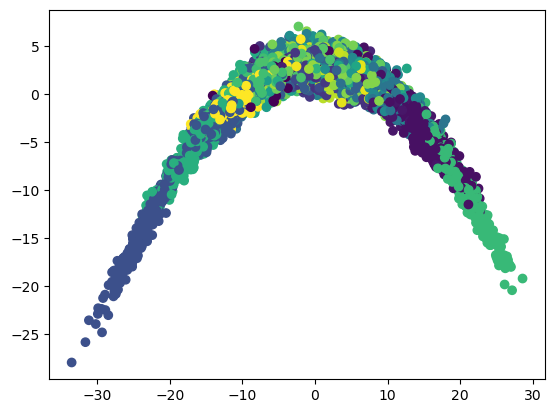

In [62]:
result = simulate_gaussian_mixture(10000,alpha,mu,sigma)
data=result["sim"]
label=result["label"]
plt.scatter(data[:,0],data[:,1],c=label)

